In [1]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from pathlib import Path

In [2]:
torch.manual_seed(1)

def image_grid(imgs, rows=1, cols=None):
    if cols is None: cols = math.ceil(len(imgs)/rows)
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [3]:
model_nm = "CompVis/stable-diffusion-v1-4"

output_dir="sd-concept-output"
pipe = StableDiffusionPipeline.from_pretrained(output_dir, torch_dtype=torch.float16).to("cuda")

In [4]:
num_samples,num_rows = 2,2

In [ ]:
prompt = "a hyper-realistic high definition render of <tiny> sitting on a pink rug, 4k"
all_images = [] 
for _ in range(num_rows):
    images = pipe([prompt] * num_samples, num_inference_steps=100, guidance_scale=15).images
    all_images.extend(images)

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

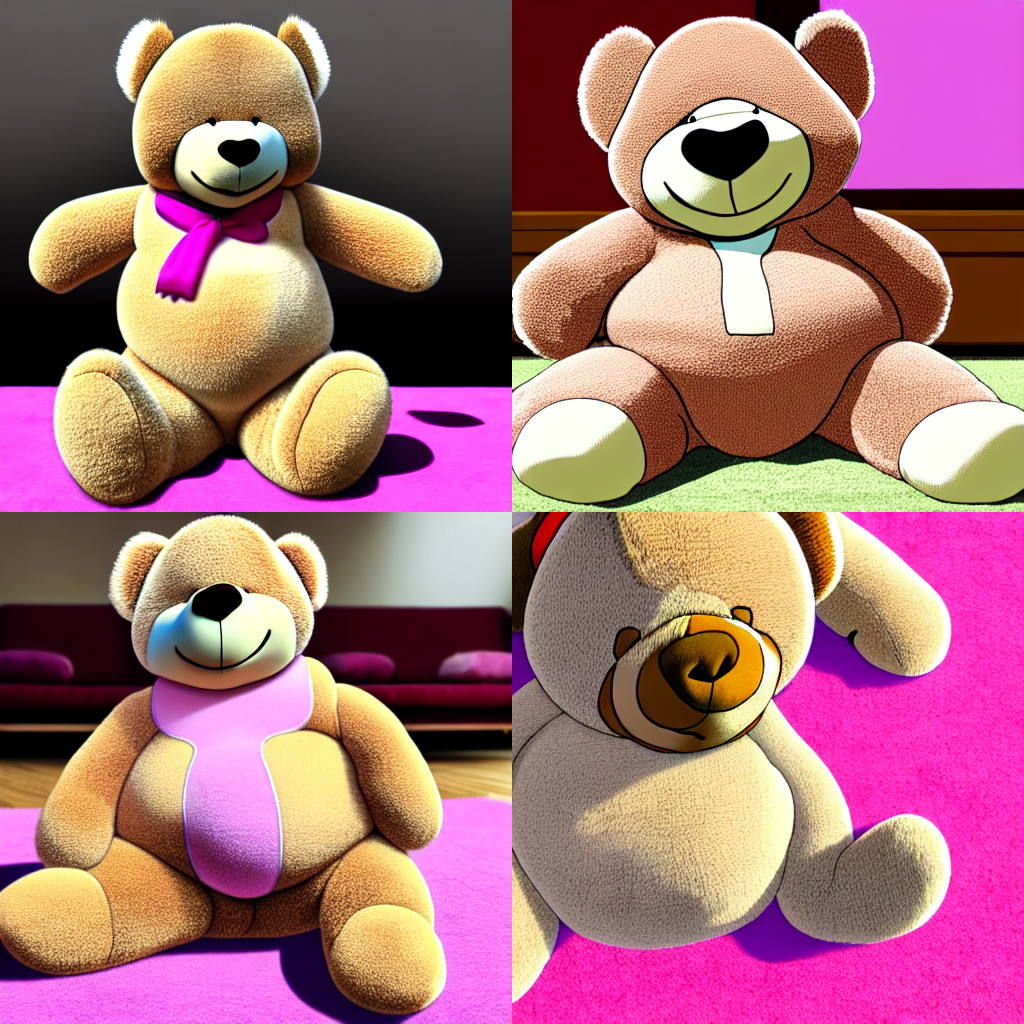

In [35]:
image_grid(all_images, num_samples, num_rows)